In [ ]:
import pickle
import os
import textwrap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel
import altair as alt
from altair import datum

from dltools.cov.markup import compute

alt.renderers.enable('notebook')

In [ ]:
filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I1p,I1p.pickle"

In [1]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "ke", "sumke"
n = d["N"]
dx = d["Sum[XYZ]"][xkey][1] - d["Sum[XYZ]"][xkey][0]
x = d["Sum[XYZ]"][xkey] + dx / 2
y = d["Sum[XYZ]"][ykey]
where = 0 < y

df = pd.concat([
    pd.DataFrame({
        "Total KE (eV)": x[where],
        "Type": "Coinc",
        "Yield (count)": y[where],
        "Std (count)": y[where] ** 0.5,
    }),
    pd.DataFrame({
        "Total KE (eV)": x[where],
        "Type": "Cov",
        "Yield (count)": d["Cov[X,Y,Z]"][ykey][where] * n,
        "Std (count)": d["Err[Cov[X,Y,Z]]"][ykey] * n,
    }),   
], ignore_index=True)
df

NameError: name 'pickle' is not defined

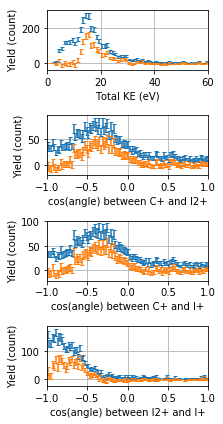

In [7]:
plt.figure(figsize=(3.2, 6))
filename = "Data/Cov ang dist and KER at the low int group; target=C1p,I1p,I1p.pickle"
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "ke", "sumke"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(411)
plt.xlabel("Total KE (eV)")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
)
plt.grid(True)
plt.xlim(0, 60)

xkey, ykey = "cosang", "h0h1angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(412)
plt.xlabel("cos(angle) between C+ and I2+")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
)
plt.grid(True)
plt.xlim(-1, 1)

xkey, ykey = "cosang", "h0h2angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(413)
plt.xlabel("cos(angle) between C+ and I+")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
)
plt.grid(True)
plt.xlim(-1, 1)

xkey, ykey = "cosang", "h1h2angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.subplot(414)
plt.xlabel("cos(angle) between I2+ and I+")
plt.ylabel("Yield (count)")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
)
plt.grid(True)
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()

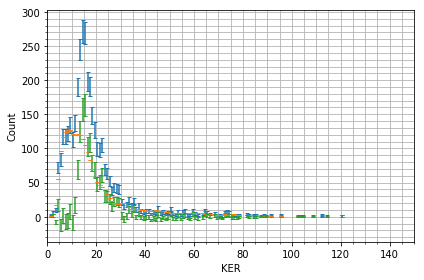

In [4]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "ke", "sumke"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.figure()
plt.xlabel("KER")
plt.ylabel("Count")
plt.errorbar(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    d["Sum[XYZ]"][ykey][where] ** 0.5,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.errorbar(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    ((d["Err[Cov[X,Y,Z]]"][ykey] * n) ** 2 - d["Sum[XYZ]"][ykey])[where] ** 0.5,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.minorticks_on()
plt.grid(True, which="both")
plt.xlim(0, 150)
plt.tight_layout()
plt.show()

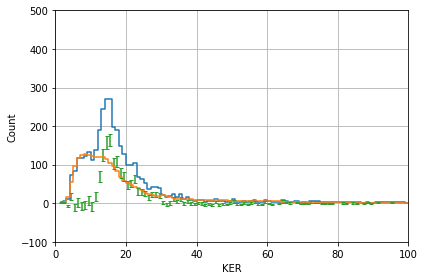

In [5]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "ke", "sumke"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.figure()
plt.xlabel("KER")
plt.ylabel("Count")
plt.step(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    where="mid",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(-100, 500)
plt.tight_layout()
plt.show()

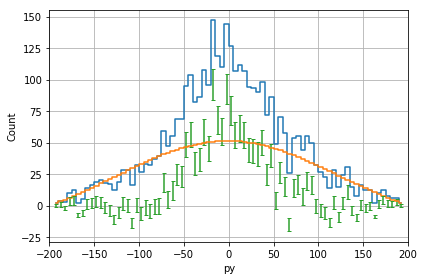

In [6]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "p", "sumpy"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.figure()
plt.xlabel("py")
plt.ylabel("Count")
plt.step(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    where="mid",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(-200, 200)
plt.tight_layout()
plt.show()

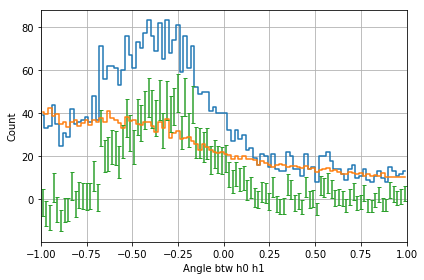

In [7]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "cosang", "h0h1angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.figure()
plt.xlabel("Angle btw h0 h1")
plt.ylabel("Count")
plt.step(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    where="mid",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()

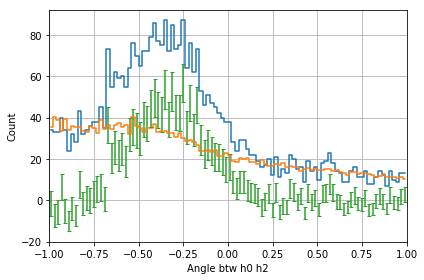

In [8]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "cosang", "h0h2angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.figure()
plt.xlabel("Angle btw h0 h2")
plt.ylabel("Count")
plt.step(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    where="mid",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()

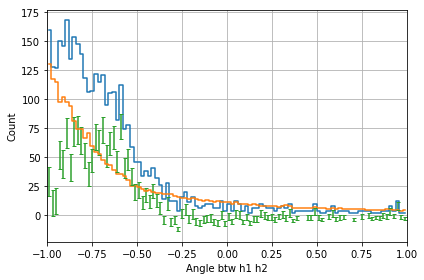

In [9]:
with open(filename, "rb") as fp:
    d = pickle.load(fp)

xkey, ykey = "cosang", "h1h2angle"
n = d["N"]
dx = d["Cov[X,Y,Z]"][xkey][1] - d["Cov[X,Y,Z]"][xkey][0]
x = d["Cov[X,Y,Z]"][xkey] + dx / 2
where = 0 < d["Sum[XYZ]"][ykey]

plt.figure()
plt.xlabel("Angle btw h1 h2")
plt.ylabel("Count")
plt.step(
    x[where],
    d["Sum[XYZ]"][ykey][where],
    where="mid",
)
plt.step(
    x[where],
    (d["Sum[XYZ]"][ykey] - d["Cov[X,Y,Z]"][ykey] * n)[where],
    where="mid",
)
plt.errorbar(
    x[where],
    d["Cov[X,Y,Z]"][ykey][where] * n,
    d["Err[Cov[X,Y,Z]]"][ykey][where] * n,
    fmt=" ",
    capsize=2,
    label="Cov",
)
plt.grid(True)
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()